# Flight Price Prediction Project

##### Part 1- Data Modelling and Testing

##### In this program, the scraped data from Expedia website is analysed and model development and testing is performed to obtain a model to predict the price of flight ticket fare.The name of the file containing the scraped data is "expedia_5.csv"

In [47]:
#Importing the neccesary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import math

In [294]:
#Loading the data

df=pd.read_csv("expedia_5.csv") #Expedia database

In [295]:
#Defining the columns for the dataframe
df.columns =['Serial','Departure_time','Arrival_time','Departure_city','Arrival_city','Departure_date','Airline','Stops','Price']

In [296]:
#Dropping the "Serial" column
df=df.drop(["Serial"],axis=1)

In [297]:
#All the columns are of object type, time,date and price column have to converted to integer type

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5346 entries, 0 to 5345
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Departure_time  5346 non-null   object
 1   Arrival_time    5346 non-null   object
 2   Departure_city  5346 non-null   object
 3   Arrival_city    5346 non-null   object
 4   Departure_date  5346 non-null   object
 5   Airline         5346 non-null   object
 6   Stops           5346 non-null   object
 7   Price           5346 non-null   object
dtypes: object(8)
memory usage: 334.2+ KB


In [6]:
df.describe()

,Departure_time,Arrival_time,Departure_city,Arrival_city,Departure_date,Airline,Stops,Price
count,5346,5346,5346,5346,5346,5346,5346,5346
unique,80,139,1,6,9,4,3,234
top,20:30,19:45,Hyderabad (HYD),Ahmedabad (AMD),09-Feb-23,Vistara,1 stop,"₹11,771"
freq,380,293,5346,3245,3951,2906,4548,605


In [7]:
#The dataset had 5346 rows and 8 columns
#
df.shape

(5346, 8)

In [8]:
for i in df.columns:
    print("Column",i,"has",len(df[i].unique()),"unique values")

Column Departure_time has 80 unique values
Column Arrival_time has 139 unique values
Column Departure_city has 1 unique values
Column Arrival_city has 6 unique values
Column Departure_date has 9 unique values
Column Airline has 4 unique values
Column Stops has 3 unique values
Column Price has 234 unique values


In [298]:
#Dropping duplicate values from the dataset

df1=df.drop_duplicates()


In [299]:
#From the departure_time and arrival_time columns, we are extracting the hours

spare6=df1["Departure_time"]
spare7=[]
for i in spare6:
    spare7.append(i.split(":"))
spare8=[]
for i in range(len(spare7)):
    spare8.append(spare7[i][0])
df1["Departure_time"]=spare8

In [300]:
spare4=df1["Arrival_time"]
spare5=[]
for i in spare4:
    spare5.append(i.split(":"))
spare6=[]
for i in range(len(spare5)):
    spare6.append(spare5[i][0])
df1["Arrival_time"]=spare6

In [301]:
#Removing the rupee symbol from the price column and converting into integer type

df1["Price"]=df1["Price"].replace("₹","",regex=True)
df1["Price"]=df1["Price"].replace(",","",regex=True)
df1["Price"]=df1["Price"].astype("int")



In [302]:
#Converting the departure_date column from object to datetime format

df1["Departure_date"]=pd.to_datetime(df1["Departure_date"])

In [303]:
#Converting the departure time and arrival time columns to integer type

df1["Departure_time"]=df1["Departure_time"].astype("int")
df1["Arrival_time"]=df1["Arrival_time"].astype("int")

In [304]:
#Extracing only the day from the date since the year and month are same for all entries

df1["Day"]=df1["Departure_date"].apply(lambda x:x.day)

In [305]:
df1.drop("Departure_date",axis=1,inplace=True)

# Univariate Analysis

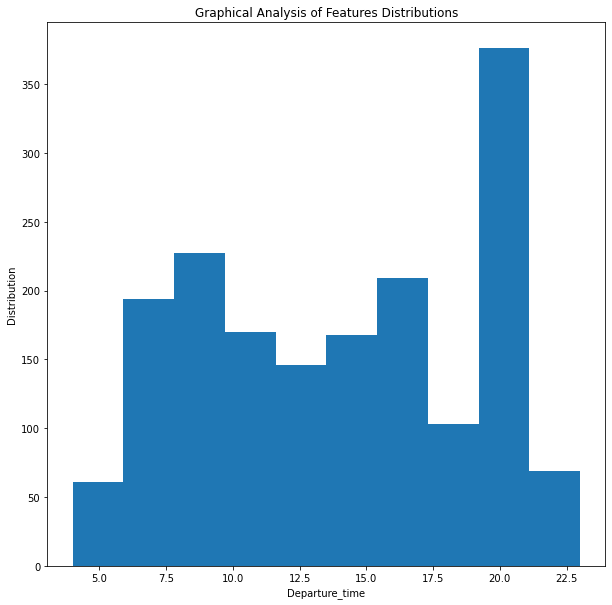

In [306]:
#Majority of the tickets are having departure time of 6-10 PM followed by 7-10AM and 4-5 PM

plt.figure(figsize=(10,10))
plt.hist(df1["Departure_time"])
plt.xlabel("Departure_time") 
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

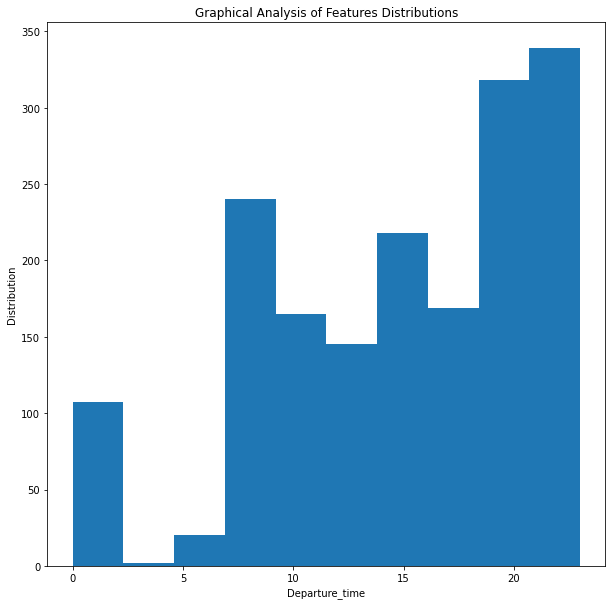

In [99]:
#Majority of the tickets are having arrival time of 6-9PM followed by 7-10AM
plt.figure(figsize=(10,10))
plt.hist(df1["Arrival_time"])
plt.xlabel("Departure_time")
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

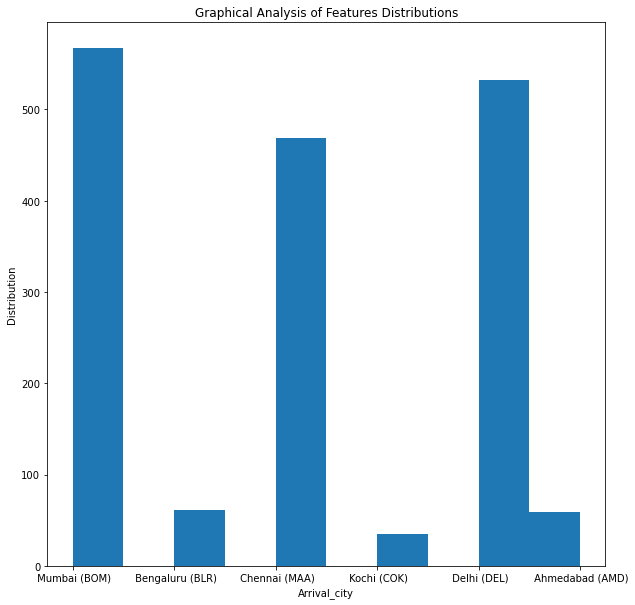

In [100]:
#The flights deprting from hyderabad to the mentioned cities-Mumbai,Bangalore,Chennai,Kochi,Delhi and Ahmedabad
#Most of the flights are arriving at Mumbai followed by Delhi and Chennai.

plt.figure(figsize=(10,10))
plt.hist(df1["Arrival_city"])
plt.xlabel("Arrival_city")
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

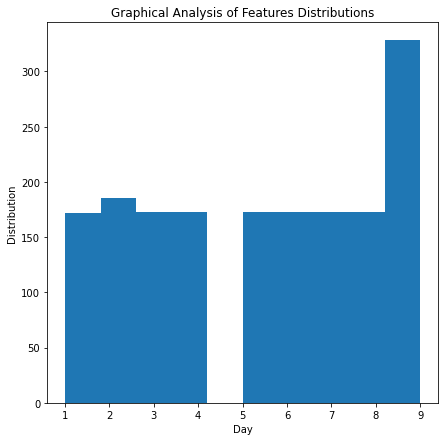

In [292]:
#The number of flights on 9th Feb 2023 is the highest followed by 2nd Feb.
plt.figure(figsize=(7,7))
plt.hist(df1["Day"])
plt.xlabel("Day")
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

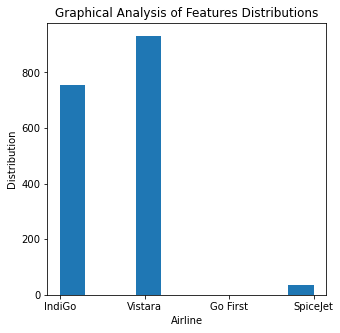

In [307]:
#Most of the flights are of airline-Vistara followed by Indigo and Spicejet and least is Go First.

plt.figure(figsize=(5,5))
plt.hist(df1["Airline"])
plt.xlabel("Airline")
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

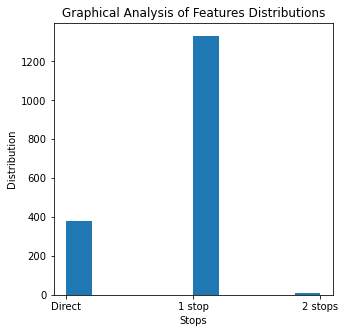

In [308]:
#1300 flights are having one stop followed by 300 flights are direct

plt.figure(figsize=(5,5))
plt.hist(df1["Stops"])
plt.xlabel("Stops")
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

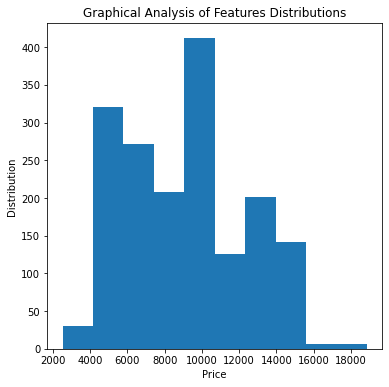

In [309]:
#The pricing of 430 tickets is between 9000-10000 followed by 320 tickets having a price range of 4000-5000
#There are less tickets with price range of 15000-18000 and 2000-4000

plt.figure(figsize=(6,6))
plt.hist(df1["Price"])
plt.xlabel("Price")
plt.ylabel("Distribution")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

# Bivariate Analysis

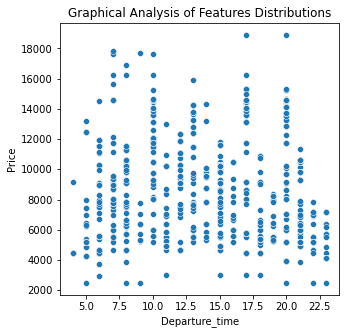

In [310]:
#The pricing is high for peak-time departure and price is comparatively less for early morning and late night flights

plt.figure(figsize=(5,5))
sns.scatterplot(df1["Departure_time"],df1["Price"])
plt.xlabel("Departure_time")
plt.ylabel("Price")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

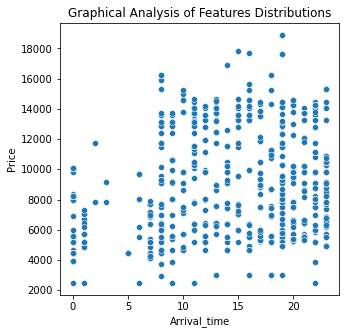

In [311]:
#The pricing is less for mid-night and early morning(till 7 AM) arrivals

plt.figure(figsize=(5,5))
sns.scatterplot(df1["Arrival_time"],df1["Price"])
plt.xlabel("Arrival_time")
plt.ylabel("Price")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

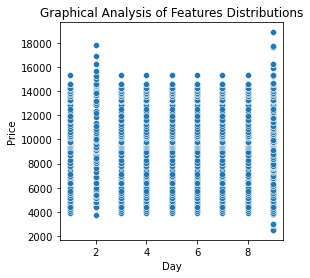

In [312]:
#2nd and 9th Feb have the high ticket fare
#1st,3rd,4th,5th,6th,7th and 8th have almost same pricing

plt.figure(figsize=(4,4))
sns.scatterplot(df1["Day"],df1["Price"])
plt.xlabel("Day")
plt.ylabel("Price")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

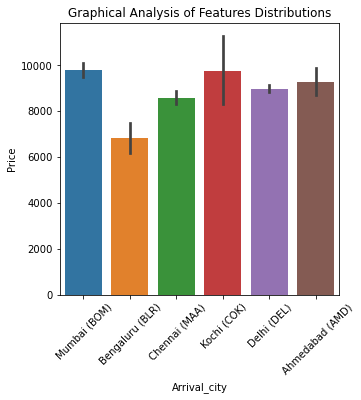

In [314]:
#From hyderabad the flights to Mumbai and Kochi are higher price range followed by Ahmedabad, Delhi, Chennai and Banaglore

plt.figure(figsize=(5,5))
sns.barplot(x=df1["Arrival_city"],y=df1["Price"],data=df1)
plt.xlabel("Arrival_city")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.title("Graphical Analysis of Features Distributions")
plt.show()

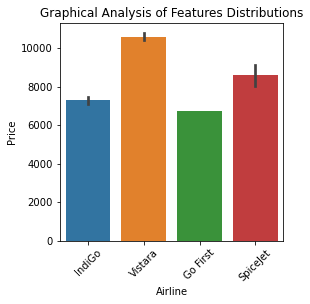

In [315]:
#Vistara airlines have higher price range followed by Spiceject, Indigo and Gofirst

plt.figure(figsize=(4,4))
sns.barplot(x=df1["Airline"],y=df1["Price"],data=df1)
plt.xlabel("Airline")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.title("Graphical Analysis of Features Distributions")
plt.show()

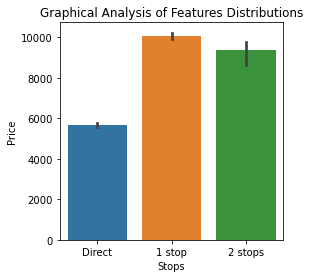

In [316]:
#1-stop flights are higher in price followed by 2-stops and direct flights are in less price range.

plt.figure(figsize=(4,4))
sns.barplot(x=df1["Stops"],y=df1["Price"],data=df1)
plt.xlabel("Stops")
plt.ylabel("Price")
plt.title("Graphical Analysis of Features Distributions")
plt.show()

# Multivariate Analysis

In [33]:
#Departure_time and arrival_time have the high positiver correlation with price

df1.corr()["Price"]

Departure_time    0.076029
Arrival_time      0.196822
Price             1.000000
Day              -0.043511
Name: Price, dtype: float64

<AxesSubplot:>

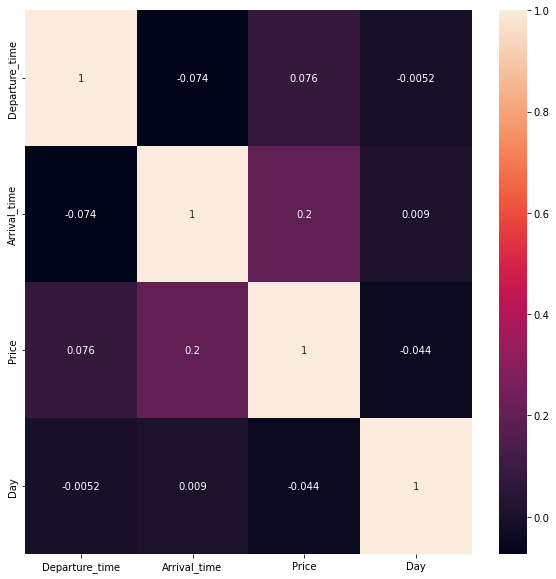

In [74]:
#Checking Correlation by plotting heatmap
plt.figure(figsize=(10,10))
sns.heatmap(df1.corr(),annot=True)

Departure_time       AxesSubplot(0.125,0.125;0.168478x0.755)
Arrival_time      AxesSubplot(0.327174,0.125;0.168478x0.755)
Price             AxesSubplot(0.529348,0.125;0.168478x0.755)
Day               AxesSubplot(0.731522,0.125;0.168478x0.755)
dtype: object

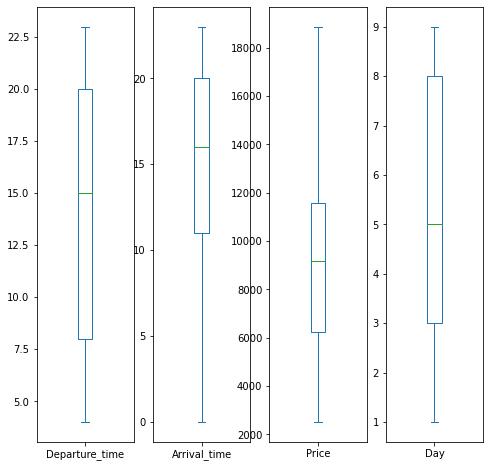

In [109]:
#On plotting the box plot for the data to check for outliers, there are no outliers

df1.plot(kind='box',subplots=True,figsize=(8,8))

# Data Pre-processing

In [317]:
#deleting departure_city since it has only one value
df1.drop("Departure_city",axis=1,inplace=True)

In [318]:
df1

,Departure_time,Arrival_time,Arrival_city,Airline,Stops,Price,Day
0,6,8,Mumbai (BOM),IndiGo,Direct,4482,1
1,15,16,Mumbai (BOM),Vistara,Direct,4688,1
2,8,10,Mumbai (BOM),Vistara,Direct,4688,1
3,6,8,Mumbai (BOM),Vistara,Direct,4688,1
4,12,14,Mumbai (BOM),Vistara,Direct,4688,1
...,...,...,...,...,...,...,...
2155,7,8,Ahmedabad (AMD),Vistara,1 stop,11771,9
2156,17,19,Ahmedabad (AMD),Vistara,1 stop,11771,9
2157,20,22,Ahmedabad (AMD),Vistara,1 stop,11771,9
2158,10,15,Ahmedabad (AMD),Vistara,1 stop,14663,9


In [319]:
#Encoding categorical columns
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [320]:
df1["Arrival_city"]=le.fit_transform(df1["Arrival_city"])

In [321]:
df1["Airline"]=le.fit_transform(df1["Airline"])

In [322]:
df1["Stops"]=le.fit_transform(df1["Stops"])

In [323]:
df1

,Departure_time,Arrival_time,Arrival_city,Airline,Stops,Price,Day
0,6,8,5,1,2,4482,1
1,15,16,5,3,2,4688,1
2,8,10,5,3,2,4688,1
3,6,8,5,3,2,4688,1
4,12,14,5,3,2,4688,1
...,...,...,...,...,...,...,...
2155,7,8,0,3,0,11771,9
2156,17,19,0,3,0,11771,9
2157,20,22,0,3,0,11771,9
2158,10,15,0,3,0,14663,9


In [324]:
#Splitting features and target
X=df1[["Departure_time","Arrival_time","Arrival_city","Airline","Stops","Day"]]
Y=df1[["Price"]]

In [325]:
#Applying power transform
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method="yeo-johnson")
Xpt=pt.fit_transform(X)

In [326]:
#Scaling the data
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
Xnew=mm.fit_transform(Xpt)

In [327]:
#Splitting data into Training and Testing Data
#analysing the r2 score and variance score for different random state values

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

from sklearn.tree import DecisionTreeRegressor

from sklearn.neighbors import KNeighborsRegressor

from sklearn.svm import SVR

from sklearn.ensemble import GradientBoostingRegressor

from xgboost import XGBRegressor

from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error,max_error,explained_variance_score

In [328]:
lr=LinearRegression()

dt=DecisionTreeRegressor()

rf=RandomForestRegressor()

kn=KNeighborsRegressor(n_neighbors=3)

sv=SVR()

gb=GradientBoostingRegressor()

x=XGBRegressor()

ab=AdaBoostRegressor()

lst=[lr,dt,rf,kn,sv,gb,x,ab]

In [331]:
for i1 in lst:
    for i2 in range(0,5):
        x_train,x_test,y_train,y_test=train_test_split(Xnew,Y,random_state=i2,test_size=0.25)
        i1.fit(x_train,y_train)
        pred_test=i1.predict(x_test)
        pred_train=i1.predict(x_train)     
        print("Model:",i1,"random state",i2,"has r2 score-test",round(r2_score(y_test,pred_test),2),"and r2 score -train",round(r2_score(y_train,pred_train),2),"and explained variance is",round(explained_variance_score(y_test,pred_test),2))

#From the below results, the Random Forest Regressor for random-state 2 has the best result compared to other models.

Model: LinearRegression() random state 0 has r2 score-test 0.45 and r2 score -train 0.45 and explained variance is 0.45
Model: LinearRegression() random state 1 has r2 score-test 0.45 and r2 score -train 0.45 and explained variance is 0.46
Model: LinearRegression() random state 2 has r2 score-test 0.49 and r2 score -train 0.43 and explained variance is 0.49
Model: LinearRegression() random state 3 has r2 score-test 0.47 and r2 score -train 0.44 and explained variance is 0.47
Model: LinearRegression() random state 4 has r2 score-test 0.45 and r2 score -train 0.45 and explained variance is 0.45
Model: DecisionTreeRegressor() random state 0 has r2 score-test 0.9 and r2 score -train 1.0 and explained variance is 0.9
Model: DecisionTreeRegressor() random state 1 has r2 score-test 0.91 and r2 score -train 1.0 and explained variance is 0.91
Model: DecisionTreeRegressor() random state 2 has r2 score-test 0.93 and r2 score -train 1.0 and explained variance is 0.93
Model: DecisionTreeRegressor()

In [465]:
x_train,x_test,y_train,y_test=train_test_split(Xnew,Y,random_state=2,test_size=0.25)

# Random Forest Regressor

In [466]:
m1=rf.fit(x_train,y_train)
pred_train=m1.predict(x_train)
pred_test=m1.predict(x_test)

In [467]:
print(round(r2_score(y_train,pred_train),2))

0.99


In [468]:
print(round(r2_score(y_test,pred_test),2))

0.95


In [469]:
print(round(explained_variance_score(y_train,pred_train),2))

0.99


In [470]:
print(round(explained_variance_score(y_test,pred_test),2))

0.95


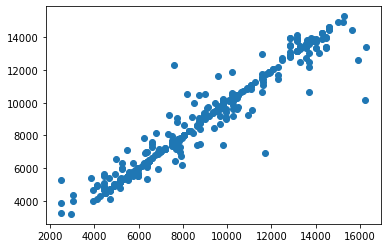

In [471]:
plt.scatter(x=y_test,y=pred_test)

In [472]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m1,Xnew,Y,cv=cv)
score1=cv1.mean()
score1

0.9326246360744099

Random Forest model has an R2 score of 0.95 and variance score of 0.95 and cross-validation score is 0.93

# Decision Tree Regressor

In [387]:
dt= DecisionTreeRegressor()
m2=dt.fit(x_train,y_train)
# apply the model to the test and training data
pred_test=m2.predict(x_test)
pred_train=m2.predict(x_train)

In [388]:
print(round(r2_score(y_train,pred_train),2))

1.0


In [389]:
print(round(r2_score(y_test,pred_test),2))

0.93


In [390]:
print(round(explained_variance_score(y_train,pred_train),2))

1.0


In [391]:
print(round(explained_variance_score(y_test,pred_test),2))

0.93


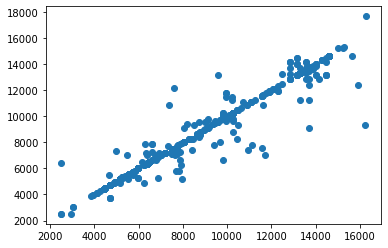

In [392]:
plt.scatter(x=y_test,y=pred_test)

In [393]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv=KFold(n_splits=10, random_state=1, shuffle=True)
cv1=cross_val_score(m2,Xnew,Y,cv=cv)
score1=cv1.mean()
score1

0.9002094109369306

Decision Tree model has an R2 score of 0.93 and variance score of 0.93 and cross-validation score is 0.9

# From the above results the random forest model is an efficient model and hyperparameter tuning is performed on the model

# Hyperparameter Tuning

In [473]:
from sklearn.model_selection import RandomizedSearchCV

In [474]:
rf=RandomForestRegressor()

In [486]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [498]:
param_dist={"criterion": ["squared_error","absolute_error","friedman_mse","poisson"],'ccp_alpha':[0.0,0.1,0.2,0.3],'n_estimators':[60,70,80,90,100]}

In [555]:
samples=7  # number of random samples 
randomCV=RandomizedSearchCV(rf, param_distributions=param_dist, n_iter=samples,cv=6)

In [556]:
final=randomCV.fit(x_train,y_train)

In [557]:
final.best_params_

{'n_estimators': 90, 'criterion': 'friedman_mse', 'ccp_alpha': 0.1}

In [558]:
pred1=final.predict(x_test)

In [559]:
pred2=final.predict(x_train)

In [560]:
print(round(r2_score(y_train,pred2),2)*100)

99.0


In [561]:
print(round(r2_score(y_test,pred1),2)*100)

95.0


In [562]:
print(round(explained_variance_score(y_train,pred_train),2))

0.99


In [563]:
print(round(explained_variance_score(y_test,pred_test),2))

0.95


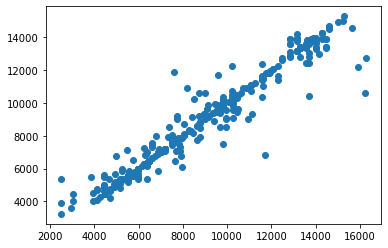

In [564]:
plt.scatter(x=y_test,y=pred1)

# Saving the model

In [332]:
import pickle
pickle.dump(final, open('Expedia-model', 'wb'))

In [333]:
pickled_model=pickle.load(open('Expedia-model', 'rb'))
pickled_model.predict(x_test)

array([ 5354.22      ,  5979.22      , 14020.5       ,  5991.53      ,
        6984.1       ,  9694.48      ,  7470.98066667,  7452.61      ,
        5500.7       , 13641.57333333, 10290.91      ,  5180.53      ,
       13630.57916667, 10453.57      , 10218.36      ,  5346.84      ,
        4688.45      ,  7178.15828571,  5493.19      , 14546.84      ,
        9488.34      , 10274.        , 10210.4       ,  4688.        ,
        7865.94      ,  5621.5       , 13404.44442857, 13162.        ,
        4083.95      , 13490.21166667,  4852.56      , 14451.6       ,
        8056.85      ,  5989.25      ,  9891.8       , 10234.1       ,
        7567.70666667,  9010.18      ,  9694.48      ,  8739.51      ,
        9802.        , 10626.56      , 14816.18      , 11901.09      ,
        9802.        ,  5516.5       ,  5524.28      ,  8632.48      ,
       14590.        , 13918.98      ,  6452.        , 10623.62      ,
        5182.7       ,  5575.62      , 10813.77      ,  7174.01161905,
      